# 미니프로젝트

In [4]:
import requests
from tqdm import tqdm
import pandas as pd
import numpy as np
import time
import my_utils_PJ as mu
import math
import random
import imp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
imp.reload(mu)
tqdm.pandas()

In [5]:
# 폰트 조정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

# 확률 구하기

In [6]:
sql_conn = mu.connect_mysql('icia')
df = pd.DataFrame(mu.mysql_execute_dict('select * from lol_mini', sql_conn))
sql_conn.close()

In [7]:
winrate= df[['gameId','teamId','win','firstChampion','firstDragon','firstTower']]

In [8]:
# 퍼블 퍼드 포블일 경우 승률
fb_fd_ft=winrate[(winrate['firstChampion']=='True')&(winrate['firstDragon']=='True')&(winrate['firstTower']=='True')]
len(fb_fd_ft)
round(len(fb_fd_ft[fb_fd_ft['win']=='True'])/len(fb_fd_ft)*100,2)

84.88

In [9]:
# 퍼블 퍼드일 경우 승률
fb_fd=winrate[(winrate['firstChampion']=='True')&(winrate['firstDragon']=='True')]
len(fb_fd)
round(len(fb_fd[fb_fd['win']=='True'])/len(fb_fd)*100,2)

73.14

In [10]:
# 퍼블 포블일 경우 승률
fb_ft=winrate[(winrate['firstChampion']=='True')&(winrate['firstTower']=='True')]
len(fb_ft)
round(len(fb_ft[fb_ft['win']=='True'])/len(fb_ft)*100,2)

76.21

In [11]:
# 퍼드 포블일 경우 승률
fd_ft=winrate[(winrate['firstDragon']=='True')&(winrate['firstTower']=='True')]
len(fd_ft)
round(len(fd_ft[fd_ft['win']=='True'])/len(fd_ft)*100,2)

82.4

In [12]:
# 퍼블 승률
fb=winrate[winrate['firstChampion']=='True']
round(len(fb[fb['win']=='True'])/len(fb)*100,2)

59.95

In [37]:
# 퍼드 승률
fd=winrate[winrate['firstDragon']=='True']
round(len(fd[fd['win']=='True'])/len(fd)*100,2)

68.7

In [14]:
# 포블 승률
ft=winrate[winrate['firstTower']=='True']
round(len(ft[ft['win']=='True'])/len(ft)*100,2)

72.8

In [207]:
# win 퍼블 퍼드 포블 bool값을 int로 변경
winrate2 = winrate.copy()
winrate2['win']=winrate2['win'].apply(lambda x:1 if x=='True' else 0)
winrate2['firstChampion']=winrate2['firstChampion'].apply(lambda x:1 if x=='True' else 0)
winrate2['firstDragon']=winrate2['firstDragon'].apply(lambda x:1 if x=='True' else 0)
winrate2['firstTower']=winrate2['firstTower'].apply(lambda x:1 if x=='True' else 0)

In [35]:
win_cnt=winrate[winrate['win']=='True']
fc_cnt=win_cnt.groupby(['firstChampion'])[['win']].count()
fc_cnt['rate']=round(fc_cnt.win/fc_cnt.sum().win*100,2)
fc_cnt

,win,rate
firstChampion,,
False,795,40.05
True,1190,59.95


In [36]:
win_cnt=winrate[winrate['win']=='True']
fd_cnt=win_cnt.groupby(['firstDragon'])[['win']].count()
fd_cnt['rate']=round(fd_cnt.win/fd_cnt.sum().win*100,2)
fd_cnt

,win,rate
firstDragon,,
False,635,31.99
True,1350,68.01


In [38]:
win_cnt=winrate[winrate['win']=='True']
ft_cnt=win_cnt.groupby(['firstTower'])[['win']].count()
ft_cnt['rate']=round(ft_cnt.win/ft_cnt.sum().win*100,2)
ft_cnt

,win,rate
firstTower,,
False,540,27.2
True,1445,72.8


In [42]:
tot_cnt = win_cnt.groupby(['firstChampion','firstDragon','firstTower'])[['win']].count()
tot_cnt['rate']=round(tot_cnt.win/tot_cnt.sum().win*100,2)
tot_cnt

win   rate
firstChampion firstDragon firstTower            
False         False       False       130   6.55
                          True        200  10.08
              True        False       165   8.31
                          True        300  15.11
True          False       False        90   4.53
                          True        215  10.83
              True        False       155   7.81
                          True        730  36.78

In [43]:
tot_cnt.sort_values(by=['rate'], ascending=False)

win   rate
firstChampion firstDragon firstTower            
True          True        True        730  36.78
False         True        True        300  15.11
True          False       True        215  10.83
False         False       True        200  10.08
              True        False       165   8.31
True          True        False       155   7.81
False         False       False       130   6.55
True          False       False        90   4.53

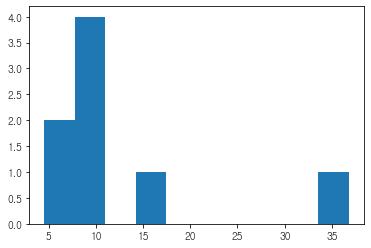

In [82]:
lst=[]
for i in range(8):
    lst.append(tot_cnt.iloc[i]['rate'])
plt.hist(lst,label='bins=10')

plt.show()

<AxesSubplot:title={'center':'퍼스트 블러드 후 승률'}, xlabel='firstChampion', ylabel='count'>

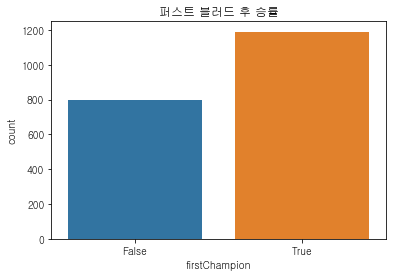

In [74]:
plt.figure()
plt.title('퍼스트 블러드 후 승률')
sns.countplot(x='firstChampion',data=win_cnt,order=['False','True'])

<AxesSubplot:title={'center':'첫 드래곤 제거 후 승률'}, xlabel='firstDragon', ylabel='count'>

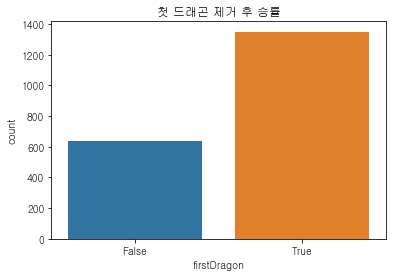

In [75]:
plt.figure()
plt.title('첫 드래곤 제거 후 승률')
sns.countplot(x='firstDragon',data=win_cnt,order=['False','True'])

<AxesSubplot:title={'center':'첫 포탑 파괴후 승률'}, xlabel='firstDragon', ylabel='count'>

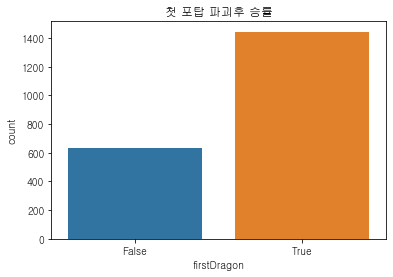

In [64]:
plt.figure()
plt.title('첫 포탑 파괴 후 승률')
sns.countplot(x='firstTower',data=win_cnt,order=['False','True'])

In [70]:
win_df = df[df['win']=='True']
win_df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25
0,KR_6391207496,1342,13.4.494.1549,O7 top,105,1,Jayce,12018,TOP,100,...,5982,6827,7429,7989,8285,9223,9981,10185,0,0
1,KR_6391207496,1342,13.4.494.1549,leidianyayi,222,2,JarvanIV,8725,JUNGLE,100,...,6012,6184,6576,6779,7470,8027,8366,8848,0,0
2,KR_6391207496,1342,13.4.494.1549,Fzzovo,50,3,Viktor,10178,MIDDLE,100,...,6725,6935,7875,7997,9032,9205,9497,9869,0,0
3,KR_6391207496,1342,13.4.494.1549,결 혼,408,4,Varus,10953,BOTTOM,100,...,6904,7521,8185,8818,9279,9547,9855,10169,0,0
4,KR_6391207496,1342,13.4.494.1549,xingyunxiaojiang,213,5,Blitzcrank,7222,UTILITY,100,...,5500,5802,6082,6268,6619,6905,7131,7210,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,KR_6413509075,1316,13.5.495.8836,어리고싶다,742,6,Jax,12246,TOP,200,...,6594,7751,8433,8705,9275,9907,10685,0,0,0
3966,KR_6413509075,1316,13.5.495.8836,Epilogue for you,468,7,RekSai,8362,JUNGLE,200,...,6039,6559,6881,7248,7669,8116,8448,0,0,0
3967,KR_6413509075,1316,13.5.495.8836,HLE Loki 19,661,8,Zoe,9800,MIDDLE,200,...,7022,7236,7505,7909,8150,8853,9135,0,0,0
3968,KR_6413509075,1316,13.5.495.8836,낭만닥터 이준민,540,9,Zeri,10774,BOTTOM,200,...,7873,8269,8820,9373,9831,10432,11116,0,0,0
